# O SVM (Support Vector Machine)

Pega os pontos mais próximos de classes diferentes e define as margens de separação através de um hiperplano.

In [6]:
# Importando bibliotecas
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregando os dados
x, y = load_iris(return_X_y=True, as_frame=True)

In [4]:
# Considerando apenas duas colunas de pétala e os targets
X = x.loc[y.isin([0,1]),["petal length (cm)", "petal width (cm)"]]
y = y[y.isin([0, 1])]

In [5]:
# Separando os dados de treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

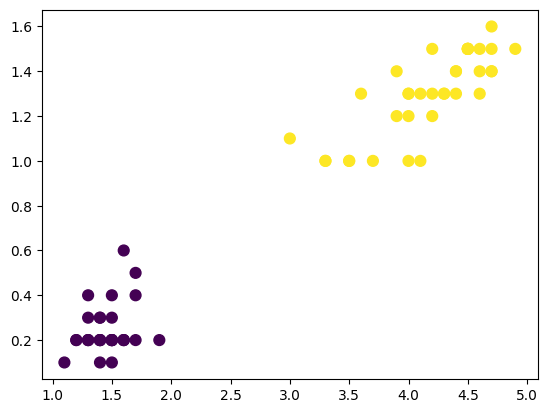

In [8]:
# Visualizando os pontos
fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train, s=60)

plt.show()

In [11]:
# Importanto o SVC
from sklearn.svm import SVC

# Criando o classificador e fazendo o treinamento
clf = SVC(kernel='linear').fit(X_train, y_train)

In [13]:
# Visualizando os coeficientes ANGULARES
clf.coef_

array([[1.1769056 , 0.78337144]])

In [14]:
# Coeficiente linear
clf.intercept_

array([-3.39254856])

Para traçar a reta, podemos considerar que a equação da reta será dada por:
- y = ax + b

Para considerar os dois coeficientes, também podemos escrever como:
- w1 * X_train[0] + w2 * X_train[1] + w0 = 0

onde w1 = coef_[0][0], w2 = coef_[0][1] e w0 = intercept_

reescrevendo a equação, temos:
y = (-w1 * x - w0) / w2

In [16]:
# Definindo os pesos
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0 = clf.intercept_[0]


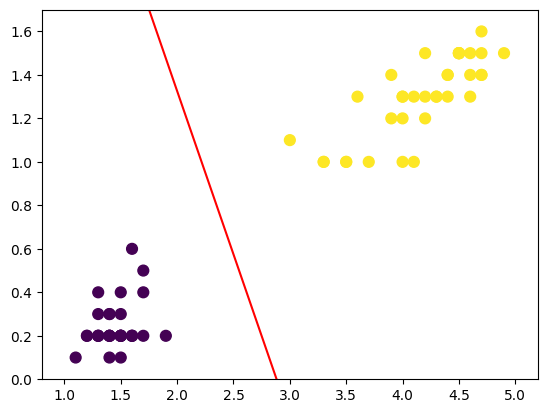

In [18]:
# Traçando a reta
fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train, s=60)

x = np.linspace(1, 5, 100)
y = (-w1 * x - w0)/ w2
ax.plot(x, y,'r')

ax.set(ylim=(0, 1.7))
plt.show()

In [19]:
# Visualizar os vetores suportes para traçar a reta
clf. support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

In [21]:
# Pegando os valores de X
clf.support_vectors_[:, 0]

# Pegando os valores de y
clf.support_vectors_[:, 1]

array([0.2, 0.5, 1.1])

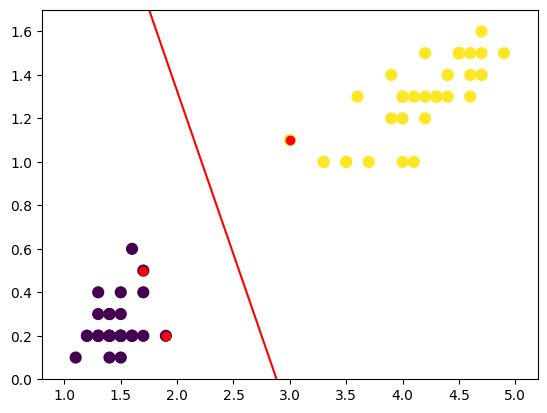

In [22]:
# Traçando a reta
fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train, s=60)

x = np.linspace(1, 5, 100)
y = (-w1 * x - w0)/ w2
ax.plot(x, y,'r')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='r')

ax.set(ylim=(0, 1.7))
plt.show()

As margens da reta são +1 e -1 da reta, ou seja
- w1 * X_train[0] + w2 * X_train[1] + w0 = 1
e
- w1 * X_train[0] + w2 * X_train[1] + w0 = -1

De maneira que se quisermos visualizar as margens, temos a equação:
- y = (+1-w1 * x - w0) / w2
e
- y = (-1-w1 * x - w0) / w2

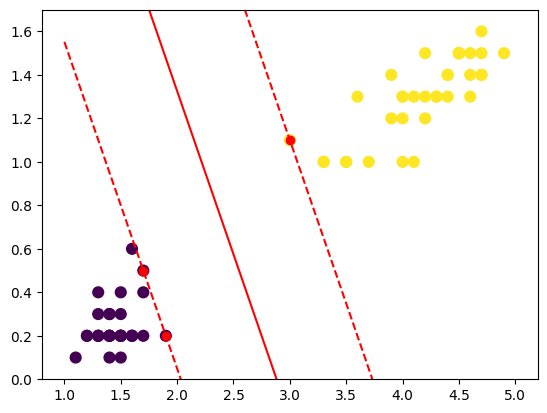

In [26]:
# Adicionando as margens
fig, ax = plt.subplots()

ax.scatter(X_train["petal length (cm)"], X_train["petal width (cm)"], c=y_train, s=60)

x = np.linspace(1, 5, 100)
y = (-w1 * x - w0)/ w2

y1 = (+1-w1 * x - w0)/ w2
y2 = (-1-w1 * x - w0)/ w2

ax.plot(x, y1,'--r')
ax.plot(x, y2,'--r')

ax.plot(x, y,'r')

ax.scatter(clf.support_vectors_[:, 0], cblf.support_vectors_[:, 1], c='r')

ax.set(ylim=(0, 1.7))
plt.show()

# Trabalhando com todas as informações

In [29]:
# Carregando os dados
X, y = load_iris(return_X_y=True, as_frame=True)

# Separando os conjuntos de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Criando o classificador e fazendo o treinamento
clf2 = SVC(kernel='linear').fit(X_train, y_train)


In [30]:
# Fazendo a previsão
y_pred = clf2.predict(X_test)

In [31]:
# Analisando a matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)